# Machine Learning
## Lab \#2: Linear Regression
### Textbook is available @ [https://www.github.com/a-mhamdi/mlpy](https://www.github.com/a-mhamdi/mlpy)
---

**Simple Linear Regression using artificial data**

In [4]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.dpi'] = 64

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Consider the following equation:
$$y\;=\;-x+2\quad\longrightarrow \left\{\begin{array}{ccc}a &=& -1\\&&\\b &=& 2\end{array}\right.$$

In [5]:
x = np.linspace(-5,5,100)
y = -x + 2

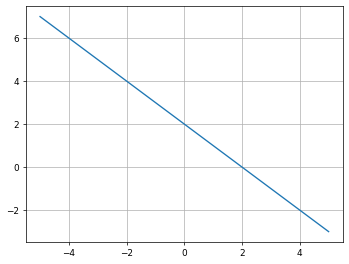

In [6]:
plt.plot(x, y)
plt.grid()

A full description of the available methods can be retrieved from the official website of [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

|Syntax|Description|
|---------:|:------------|
|`fit(X, y[, sample_weight])`| Fit linear model.|
|`get_params([deep])`|Get parameters for this estimator.|
|`predict(X)`|Predict using the linear model.|
|`score(X, y[, sample_weight])`|Return the coefficient of determination  of the prediction.|
|`set_params(**params)`|Set the parameters of this estimator.|

In [7]:
x = x.reshape(-1,1)
linear_reg = LinearRegression().fit(x, y)

In [8]:
linear_reg.score(x, y)

1.0

Coefficient $a$

In [9]:
linear_reg.coef_

array([-1.])

Intercept $b$

In [10]:
linear_reg.intercept_

2.0

Let's check for $x=5$.

In [11]:
linear_reg.predict(np.array([5]).reshape(-1,1))

array([-3.])

**Simple Linear Regression using dataset**

Load the datasets.

In [12]:
import pandas as pd

In [13]:
dataset = pd.read_csv("./datasets/Weight_Height.csv")

Check the dataset.

In [14]:
dataset.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

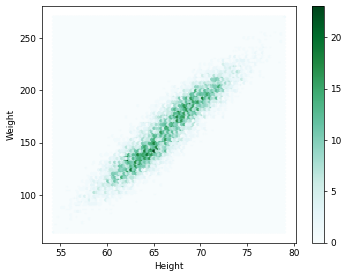

In [15]:
dataset.plot(kind='hexbin', x='Height', y='Weight');

In [16]:
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Check the dimensions of the loaded dataset.

In [17]:
dataset.shape

(10000, 3)

Check if there are null values in the dataset.

In [18]:
dataset.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

Plot *Gender* vs *Weight*.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


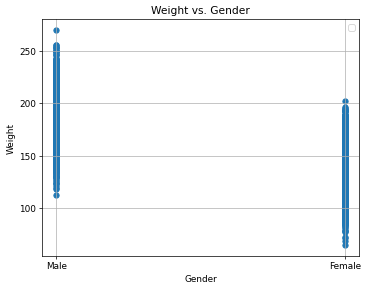

In [19]:
x1 = dataset.iloc[:, 0].values
y1 = dataset.iloc[:, 2].values
plt.scatter(x1, y1)
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Weight vs. Gender')
plt.grid()
plt.legend()

Plot *Height* vs *Weight*.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


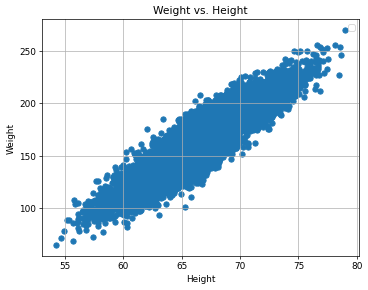

In [20]:
x2 = dataset.iloc[:, 1].values
y2 = dataset.iloc[:, 2].values
plt.scatter(x2,y2)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight vs. Height')
plt.grid()
plt.legend()

In [21]:
X = dataset.iloc[:, 1].values

Target values `y`

In [22]:
y = dataset.iloc[:, 2].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=0.2, random_state=123)

Create linear regression model.

In [24]:
w_h_regressor = LinearRegression()
w_h_regressor.fit(X_train, y_train)

LinearRegression()

Predict the training set.

In [25]:
y_pred = w_h_regressor.predict(X_train)

Display the training set results

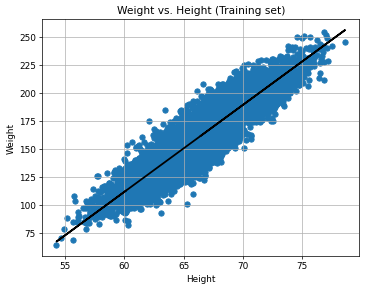

In [26]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='black', linewidth=2)
plt.title('Weight vs. Height (Training set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid()

Predict the test set.

In [27]:
y_pred = w_h_regressor.predict(X_test)

Display the test set results.

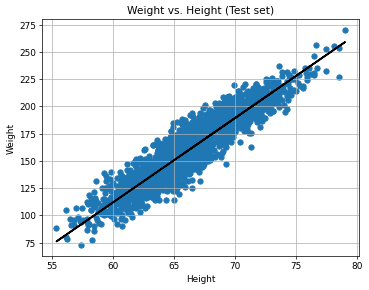

In [28]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='black', linewidth=2)
plt.title('Weight vs. Height (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid()

Overall evaluation of the model

In [29]:
print('Coefficients: ', w_h_regressor.coef_)

Coefficients:  [7.72896259]


The mean squared error

In [30]:
print('Mean squared error is {}.'.format(np.mean((y_pred - y_test)** 2)))

Mean squared error is 143.22556010111649.


The more variance score approaches to $1$, the more perfect is the prediction.

In [31]:
print('Variance score is {}.'.format(w_h_regressor.score(X_test, y_test)))

Variance score is 0.8649031737206692.
